In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loan_data = pd.read_csv('loan_outcomes.csv')

In [ ]:
# Initial overview
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         400 non-null    int64         
 1   application_at  400 non-null    datetime64[ns]
 2   loan_outcome    400 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
loan_data.head()

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid


In [ ]:
# Missing data check
loan_data.isnull().sum()

,0
user_id,0
application_at,0
loan_outcome,0


In [ ]:
#Validate Unique Data
loan_data['loan_outcome'].unique()

array(['defaulted', 'repaid'], dtype=object)

In [58]:
duplicates = loan_data.duplicated()
print("Total Duplicates:", duplicates.sum())

Total Duplicates: 0


In [ ]:
# Basic Feature Engineering
loan_data['application_year'] = loan_data['application_at'].dt.year
loan_data['application_month'] = loan_data['application_at'].dt.month
loan_data['application_day'] = loan_data['application_at'].dt.day
loan_data['is_weekend'] = loan_data['application_at'].dt.dayofweek.isin([5, 6]).astype(int)

In [ ]:
# Check for Data Imbalance
outcome_counts = loan_data['loan_outcome'].value_counts()
distribution = (loan_data['loan_outcome'] == 'defaulted').mean() * 100
print(f"\nDistribution: {distribution:.2f}%")
print("\nOutcome Distribution:\n", outcome_counts)


Distribution: 50.00%

Outcome Distribution:
 loan_outcome
defaulted    200
repaid       200
Name: count, dtype: int64


In [ ]:
# Convert to numbers for better representation
loan_data['loan_outcome'] = loan_data['loan_outcome'].map({'repaid': 1, 'defaulted': 0})

In [ ]:
loan_data.head()

,user_id,application_at,loan_outcome,application_year,application_month,application_day,is_weekend
0,1,2017-08-14 09:08:50.000000,0,2017,8,14,0
1,2,2016-05-17 10:10:12.447976,1,2016,5,17,0
2,3,2016-10-20 10:07:20.459081,0,2016,10,20,0
3,4,2017-01-13 13:03:34.000000,0,2017,1,13,0
4,5,2016-11-03 15:41:39.124610,1,2016,11,3,0


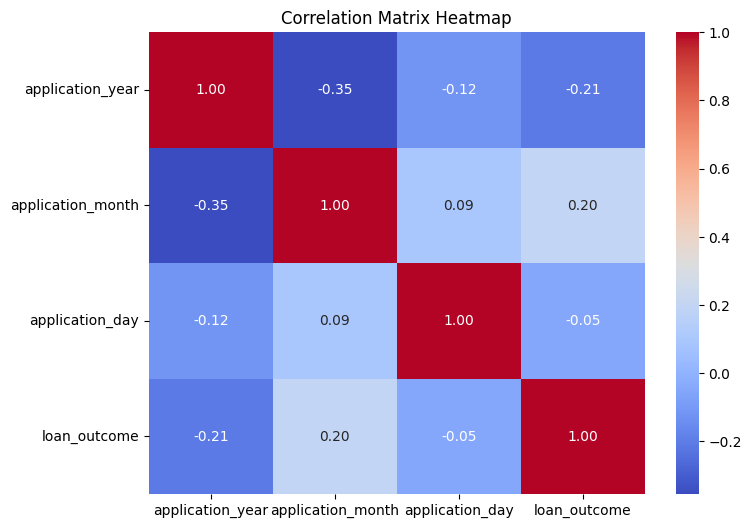

In [50]:
# Correlation Analysis
correlation_matrix = loan_data[['application_year', 'application_month', 'application_day', 'loan_outcome']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# unique users
unique_users = loan_data['user_id'].nunique()
total_applications = len(loan_data)
print(f"Unique Users: {unique_users}")
print(f"Total Applications: {total_applications}")
print(f"Average Applications per User: {total_applications / unique_users:.2f}")

Unique Users: 400
Total Applications: 400
Average Applications per User: 1.00


In [52]:
default_rate_by_month = loan_data.groupby('application_month')['loan_outcome'].apply(lambda x: 1 - x.mean())print(default_rate_by_month.sort_values(ascending=False))

application_month
1     0.652174
2     0.633333
3     0.628571
6     0.606061
4     0.545455
9     0.545455
5     0.527778
8     0.489796
7     0.439024
10    0.375000
12    0.350000
11    0.294118
Name: loan_outcome, dtype: float64


In [57]:
# high-risk users: weekend applications in Jan,Feb,March with a 'defaulted' loan outcome
high_risk_users = loan_data[(loan_data['is_weekend'] == 1) &
                             (loan_data['application_month'].isin([1, 2, 3])) &
                             (loan_data['loan_outcome'] == 0)]

print(f"Number of High-Risk Users Identified: {len(high_risk_users)}")

print("User IDs of High-Risk Users:")
print(high_risk_users['user_id'].values)


Number of High-Risk Users Identified: 17
User IDs of High-Risk Users:
[  6  18  40  76 144 184 199 232 239 249 257 258 262 306 359 363 380]


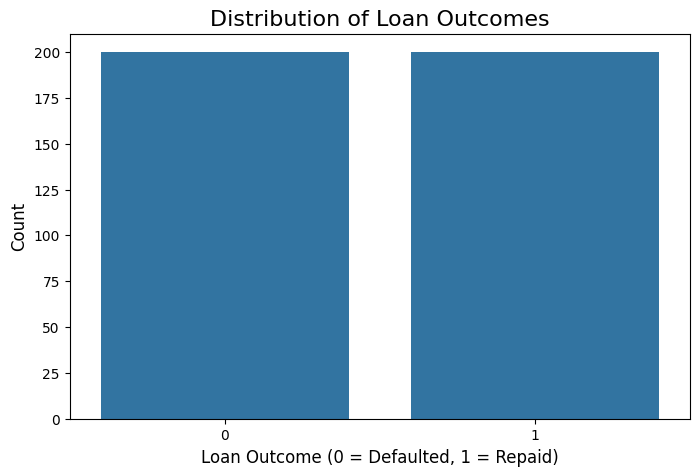

In [ ]:
# Plot the distribution of loan outcomes
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_data, x='loan_outcome')
plt.title('Distribution of Loan Outcomes', fontsize=16)
plt.xlabel('Loan Outcome (0 = Defaulted, 1 = Repaid)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

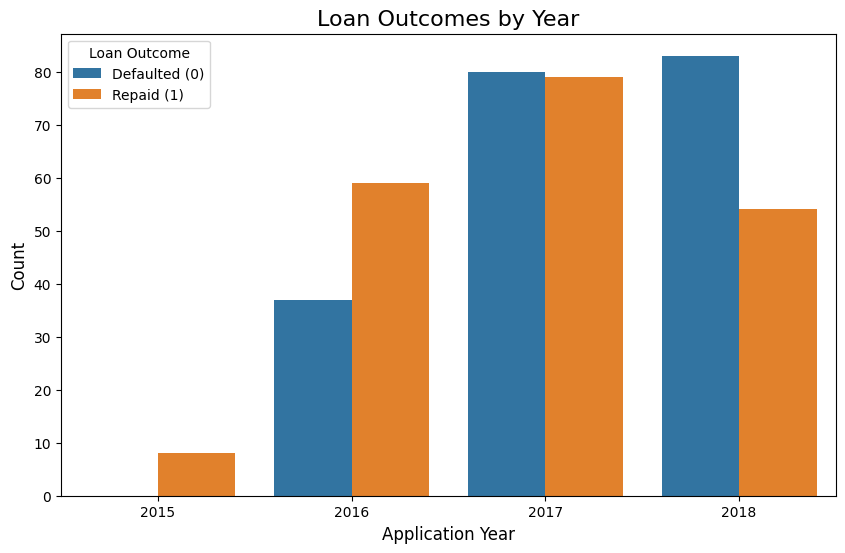

In [ ]:
# Plot the loan outcome by years
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='application_year', hue='loan_outcome')
plt.title('Loan Outcomes by Year', fontsize=16)
plt.xlabel('Application Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Outcome', labels=['Defaulted (0)', 'Repaid (1)'])
plt.show()

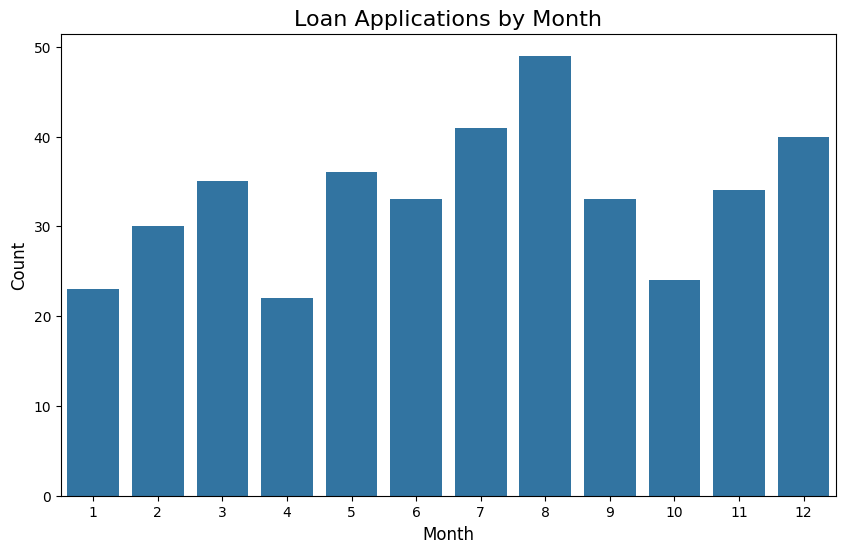

In [ ]:
# Plot loan applications by month
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='application_month')
plt.title('Loan Applications by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

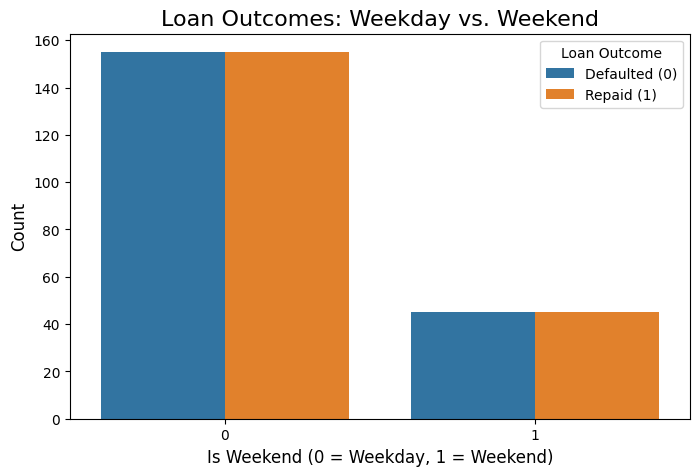

In [ ]:
#Plot loan outcome by weekend vs weekday
plt.figure(figsize=(8, 5))
sns.countplot(data=loan_data, x='is_weekend', hue='loan_outcome')
plt.title('Loan Outcomes: Weekday vs. Weekend', fontsize=16)
plt.xlabel('Is Weekend (0 = Weekday, 1 = Weekend)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Outcome', labels=['Defaulted (0)', 'Repaid (1)'])
plt.show()

<ipython-input-38-ac2573da754d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='application_day', order=range(1, 8), palette='muted')


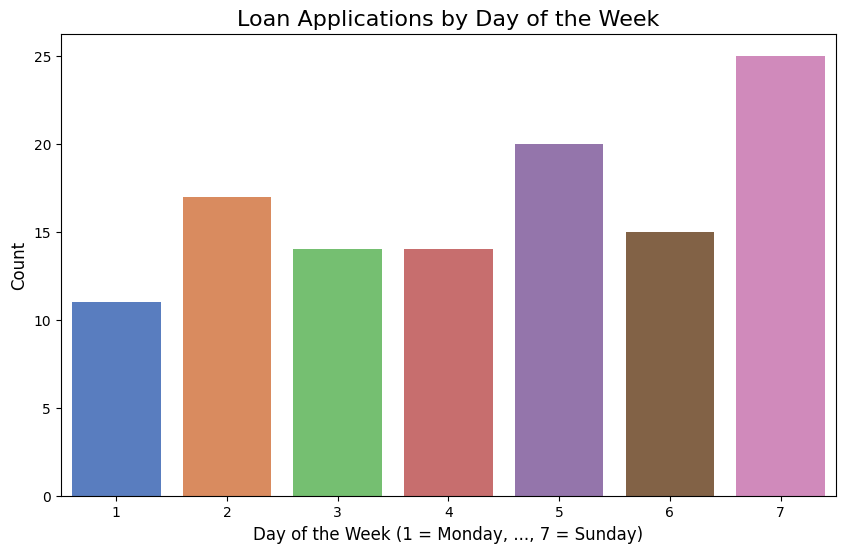

In [ ]:
# Plot Loan Applications by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='application_day', order=range(1, 8), palette='muted')
plt.title('Loan Applications by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (1 = Monday, ..., 7 = Sunday)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [59]:
loan_data.to_csv('loan_outcomes_new.csv', index=False)